In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from scipy import signal
import math

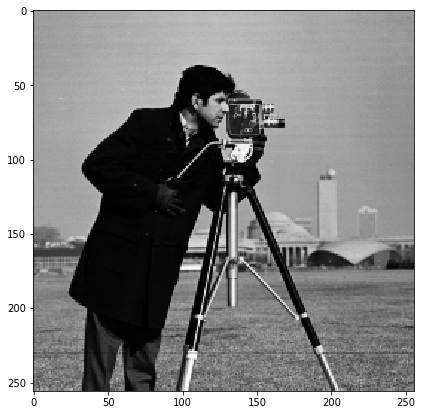

In [4]:
# Read the image and be sure it is grayscale
im_path = 'cameraman.png'
im = io.imread(im_path)
im = rgb2gray(im)

# Ensure the image is a float in the range [0-1]
im = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) *1.0)).astype('float')

# Show the image
fig1 = plt.figure(figsize = (7,7))
plt.imshow(im, cmap='gray')

In [5]:
theta = math.pi/6.0

T = np.array([[math.cos(theta), -math.sin(theta), 0], [math.sin(theta), math.cos(theta), 0], [0,0,1]])
Tinv = np.linalg.inv(T)

print(T)
print(Tinv)

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]


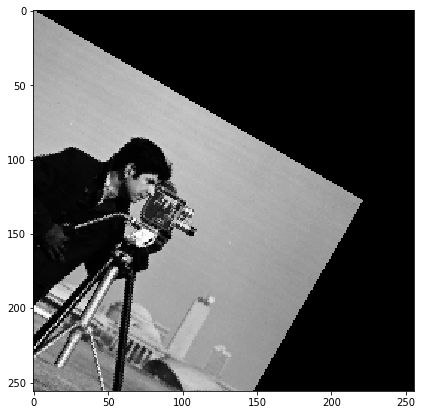

In [6]:
[rows, cols] = im.shape

out_im1 = np.zeros((rows,cols))

for i in range(0, rows):
    for j in range(0, cols):
        
        cur_pt = np.array([i,j,1])
        transformed_pt = T.dot(cur_pt)
        
        transformed_pt = transformed_pt / transformed_pt[2]
        
        # Nearest neighbor interpolation
        new_i = int(round(transformed_pt[0]))
        new_j = int(round(transformed_pt[1]))
        
        if (new_i < 0 or new_i >= rows or new_j < 0 or new_j >= cols):
            continue
            
        out_im1[i,j] = im[new_i, new_j]
        
# Show the image
fig1 = plt.figure(figsize = (7,7))
plt.imshow(out_im1, cmap='gray')

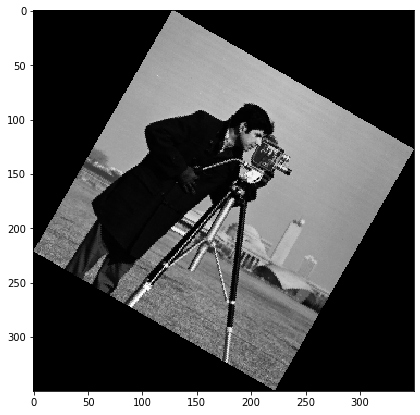

In [7]:
top_left = Tinv.dot(np.array([0.0, 0.0, 1.0], float))
top_left = top_left / top_left[2]

bottom_left = Tinv.dot(np.array([0.0, cols-1.0, 1.0], float))
bottom_left = bottom_left / bottom_left[2]

top_right = Tinv.dot(np.array([rows-1.0, 0.0, 1.0], float))
top_right = top_right / top_right[2]

bottom_right = Tinv.dot(np.array([rows-1.0, cols-1.0, 1.0], float))
bottom_right = bottom_right / bottom_right[2]

min_i = np.min([top_left[0], bottom_left[0], top_right[0], bottom_right[0]])
max_i = np.max([top_left[0], bottom_left[0], top_right[0], bottom_right[0]])

min_j = np.min([top_left[1], bottom_left[1], top_right[1], bottom_right[1]])
max_j = np.max([top_left[1], bottom_left[1], top_right[1], bottom_right[1]])

#print(rows, cols)
#print(min_i, max_i)
#print(min_j, max_j)

x_sampling = np.linspace(math.floor(min_i), math.ceil(max_i), math.ceil(max_i) - math.floor(min_i)+1)
y_sampling = np.linspace(math.floor(min_j), math.ceil(max_j), math.ceil(max_j) - math.floor(min_j)+1)

#print(x_sampling)
#print(y_sampling)

out_im2 = np.zeros((len(x_sampling), len(y_sampling)))

for i in range(0, len(x_sampling)):
    for j in range(0, len(y_sampling)):
        
        cur_pt = np.array([x_sampling[i],y_sampling[j],1.0], float)
        transformed_pt = T.dot(cur_pt)
        
        transformed_pt = transformed_pt / transformed_pt[2]
        
        # Nearest neighbor interpolation
        new_i = int(round(transformed_pt[0]))
        new_j = int(round(transformed_pt[1]))
        
        if (new_i < 0 or new_i >= rows or new_j < 0 or new_j >= cols):
            continue
            
        out_im2[i,j] = im[new_i, new_j]
        
# Show the image
fig1 = plt.figure(figsize = (7,7))
plt.imshow(out_im2, cmap='gray')